In [1]:
%matplotlib inline
import os, sys, glob
import numpy as np
from matplotlib import pyplot as plt
import mrcfile
# package up sometime?
sys.path.append('../../src/')
import cryoemio

# Setup

In [2]:
project_directory = '/Users/fpoitevi/gdrive/cryoEM/Projects/20181005-rib-TEM4/processing/'
starfile          = project_directory+'Extract/extract_one_2dclass/particles.star'

# Read star files from RELION

## load content of star file into python dictionary

In [12]:
star_content = cryoemio.star_reader(starfile)

Number of particles in this star file: 8278
The entries in the returned dictionary are:
data['metadata'].keys(): ['_rlncoordinatex', '_rlncoordinatey', '_rlnautopickfigureofmerit', '_rlnclassnumber', '_rlnanglepsi', '_rlnimagename', '_rlnmicrographname', '_rlnmagnification', '_rlndetectorpixelsize', '_rlnctfmaxresolution', '_rlnctffigureofmerit', '_rlnvoltage', '_rlndefocusu', '_rlndefocusv', '_rlndefocusangle', '_rlnsphericalaberration', '_rlnctfbfactor', '_rlnctfscalefactor', '_rlnphaseshift', '_rlnamplitudecontrast', '_rlnoriginx', '_rlnoriginy', '_rlngroupnumber', '_rlnanglerot', '_rlnangletilt', '_rlnnormcorrection', '_rlnloglikelicontribution', '_rlnmaxvalueprobdistribution', '_rlnnrofsignificantsamples']


## plot two of its entries

In [13]:
fig = plt.figure()
plt.hexbin(star_content['metadata']['_rlndefocusu'],star_content['metadata']['_rlndefocusv'], mincnt=1)
plt.title('defocus')
plt.xlabel('Zu')
plt.ylabel('Zv')
plt.show()

KeyboardInterrupt: 

# Store star file with corresponding particles in hdf5 file

In [3]:
mrcs_directory    = project_directory+'/Extract/extract_one_2dclass/Micrographs/'
hdf5file = project_directory+'/Extract/one2dclass.h5'

In [5]:
cryoemio.star2hdf5_serial(starfile, hdf5file, mrcs_directory)

> Reading star file...
Number of particles in this star file: 8278
The entries in the returned dictionary are:
data['metadata'].keys(): ['_rlncoordinatex', '_rlncoordinatey', '_rlnautopickfigureofmerit', '_rlnclassnumber', '_rlnanglepsi', '_rlnimagename', '_rlnmicrographname', '_rlnmagnification', '_rlndetectorpixelsize', '_rlnctfmaxresolution', '_rlnctffigureofmerit', '_rlnvoltage', '_rlndefocusu', '_rlndefocusv', '_rlndefocusangle', '_rlnsphericalaberration', '_rlnctfbfactor', '_rlnctfscalefactor', '_rlnphaseshift', '_rlnamplitudecontrast', '_rlnoriginx', '_rlnoriginy', '_rlngroupnumber', '_rlnanglerot', '_rlnangletilt', '_rlnnormcorrection', '_rlnloglikelicontribution', '_rlnmaxvalueprobdistribution', '_rlnnrofsignificantsamples']
> Writin metadata to h5 file...
>>> _rlncoordinatex
>>> _rlncoordinatey
>>> _rlnautopickfigureofmerit
>>> _rlnclassnumber
>>> _rlnanglepsi
>>> _rlnimagename
>>> _rlnmicrographname
>>> _rlnmagnification
>>> _rlndetectorpixelsize
>>> _rlnctfmaxresolution
>>>

In [4]:
import h5py
data = h5py.File(hdf5file, 'r') 

In [5]:
data.keys()
particles = data['particles']
particles.shape

(8278, 540, 540)

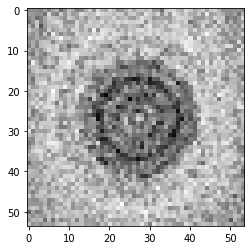

In [6]:
#plt.imshow(np.mean(particles, axis=0))
plt.imshow(np.mean(particles[::10,::10,::10], axis=0), cmap='Greys')

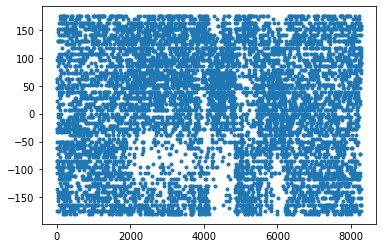

In [57]:
plt.plot(data['_rlnanglepsi'], '.')

In [42]:
def get_mrcorder_list(data, path):
    #
    list_in_data = []
    for image in data['_rlnimagename']:
        string = str(image).split("'")[1]
        frame, relpath = string.split('@')
        fname  = relpath.split('/')[-1]
        list_in_data.append(fname)
    #
    list_in_path = []
    for mrcs in glob.glob(path+'*.mrcs'):
        fname = mrcs.split('/')[-1]
        list_in_path.append(fname)
    #
    index_order = []
    for key in list_in_path:
        hits = [i for i, j in enumerate(list_in_data) if j == key]
        for hit in hits:
            index_order.append(hit)
    #
    return index_order

In [44]:
index_order = get_mrcorder_list(data, project_directory+'Extract/extract_one_2dclass/Micrographs/')

In [51]:
index_order_np = np.array(index_order)

In [52]:
index_order_np.shape

(8278,)

In [53]:
np.save(project_directory+'/Extract/index_order.npy',index_order_np)